<h4> Session 7 </h4>

<h3><i><b>Analysis of CODE2</b></i></h2>
<I>

---


**Target:**
1.   **Restructuring the architecture** with Conv block and transition blocks.
2.   Make model bit light on trainable parameters as the data is MNIST which is very small.


**Results:**
1.   Parameters: 54416
2.   Best Train Acc: 99.00
3.   Best Test Acc: 98.89
4.   Difference : 0.11
5.   Epoch - 15


**Analysis:**
1.   Model still overfits with huge gap. Need to introduce regularization.
2.   The model is less complex with reduction in kernel values.
3.   After reducing the intermediate kernel values, model still is performing good.

---


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x00000194D1383EB0>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        train = datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms)
        return torch.utils.data.DataLoader(train, **self.kwargs)

    def test_loader(self):
        test = datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms)
        return torch.utils.data.DataLoader(test, **self.kwargs)

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=256)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

##### View sample images from the train loader  <hr>



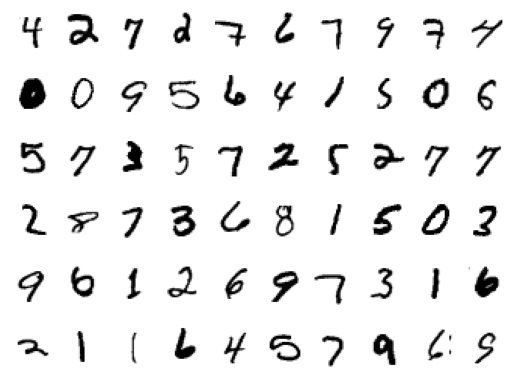

In [6]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 26, 26]           4,608
              ReLU-4           [-1, 32, 26, 26]               0
            Conv2d-5           [-1, 64, 24, 24]          18,432
              ReLU-6           [-1, 64, 24, 24]               0
         MaxPool2d-7           [-1, 64, 12, 12]               0
            Conv2d-8           [-1, 16, 12, 12]           1,024
              ReLU-9           [-1, 16, 12, 12]               0
           Conv2d-10           [-1, 32, 10, 10]           4,608
             ReLU-11           [-1, 32, 10, 10]               0
           Conv2d-12             [-1, 64, 8, 8]          18,432
             ReLU-13             [-1, 64, 8, 8]               0
        MaxPool2d-14             [-1, 6

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)

Epoch 1


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 1324/10000 (13.24%)

Epoch 2


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 2.2974, Accuracy: 1517/10000 (15.17%)

Epoch 3


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.3633, Accuracy: 8888/10000 (88.88%)

Epoch 4


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.1294, Accuracy: 9606/10000 (96.06%)

Epoch 5


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0819, Accuracy: 9736/10000 (97.36%)

Epoch 6


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0631, Accuracy: 9796/10000 (97.96%)

Epoch 7


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0526, Accuracy: 9837/10000 (98.37%)

Epoch 8


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0573, Accuracy: 9818/10000 (98.18%)

Epoch 9


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0552, Accuracy: 9825/10000 (98.25%)

Epoch 10


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0417, Accuracy: 9865/10000 (98.65%)

Epoch 11


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0458, Accuracy: 9841/10000 (98.41%)

Epoch 12


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0371, Accuracy: 9885/10000 (98.85%)

Epoch 13


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Accuracy: 9885/10000 (98.85%)

Epoch 14


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9885/10000 (98.85%)

Epoch 15


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9889/10000 (98.89%)



Plot the Loss/Accuracy for Train/Test dataset

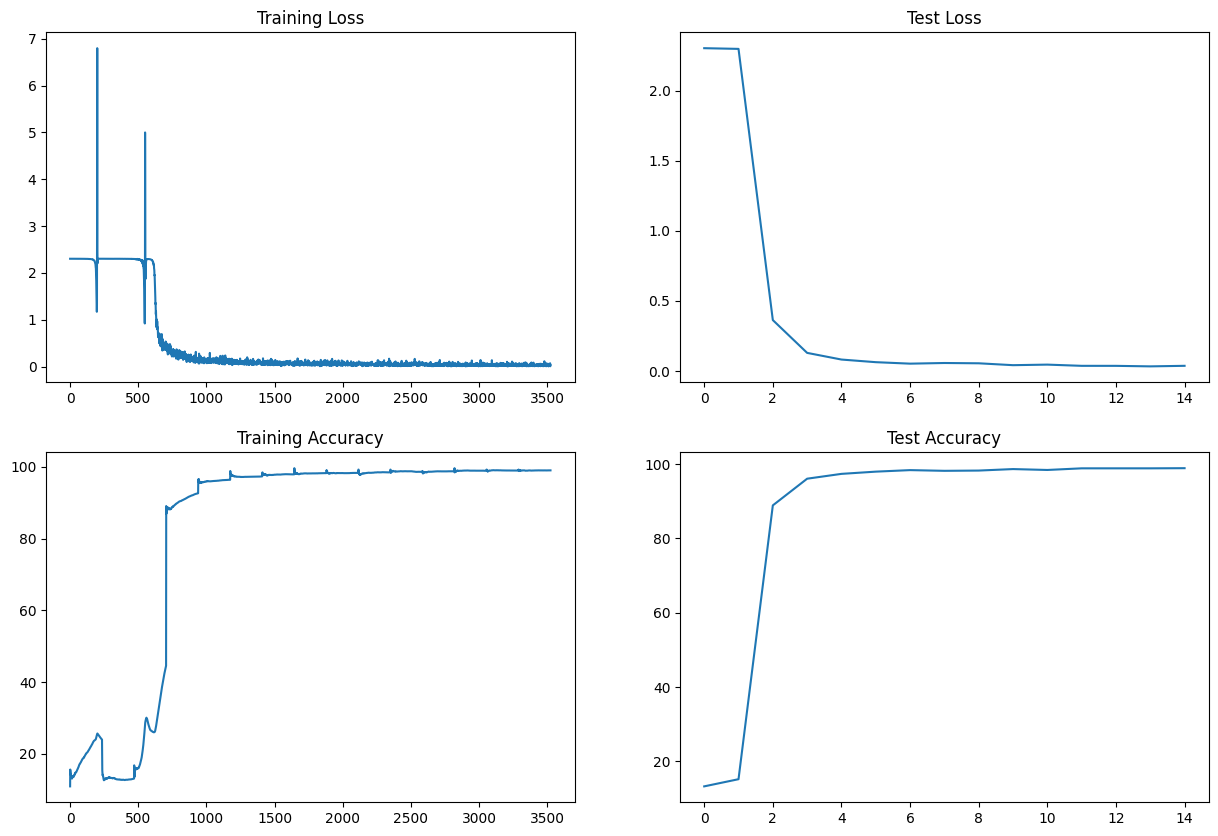

In [9]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()